In [ ]:
from google.colab import files

uploaded = files.upload()


Saving claims_data.xlsx to claims_data (1).xlsx
Saving data_dictionary.xlsx to data_dictionary (1).xlsx


In [ ]:
!file claims_data.xlsx
!file data_dictionary.xlsx


claims_data.xlsx: CSV text
data_dictionary.xlsx: Microsoft Excel 2007+


In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data (adjust if your file paths differ)
claims_df = pd.read_csv("claims_data.xlsx")   # actually CSV
dict_df   = pd.read_excel("data_dictionary.xlsx", engine="openpyxl")

# Subset assigned features (cat20–cat38 + target loss)
features = [f"cat{i}" for i in range(20, 39)]
df = claims_df[features + ["loss"]]

print("Shape:", df.shape)
df.head()

# Check feature data types
df.info()


Shape: (188318, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Data columns (total 20 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat20   188318 non-null  object 
 1   cat21   188318 non-null  object 
 2   cat22   188318 non-null  object 
 3   cat23   188318 non-null  object 
 4   cat24   188318 non-null  object 
 5   cat25   188318 non-null  object 
 6   cat26   188318 non-null  object 
 7   cat27   188318 non-null  object 
 8   cat28   188318 non-null  object 
 9   cat29   188318 non-null  object 
 10  cat30   188318 non-null  object 
 11  cat31   188318 non-null  object 
 12  cat32   188318 non-null  object 
 13  cat33   188318 non-null  object 
 14  cat34   188318 non-null  object 
 15  cat35   188318 non-null  object 
 16  cat36   188318 non-null  object 
 17  cat37   188318 non-null  object 
 18  cat38   188318 non-null  object 
 19  loss    188318 non-null  float64
dtypes: float64(1), object(19)
me

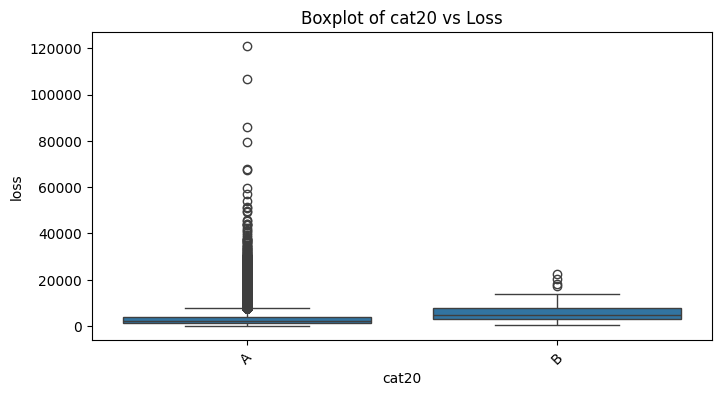

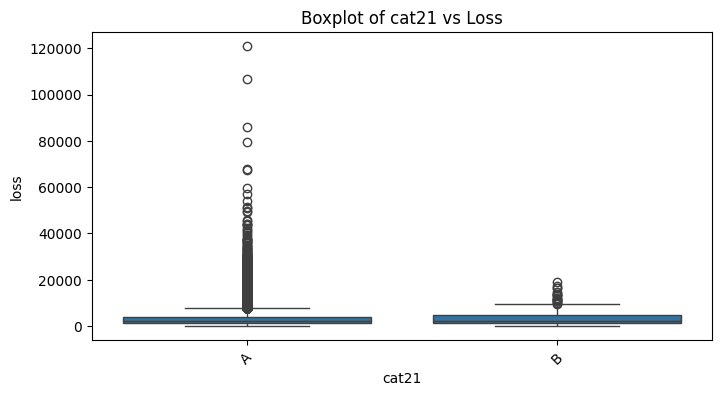

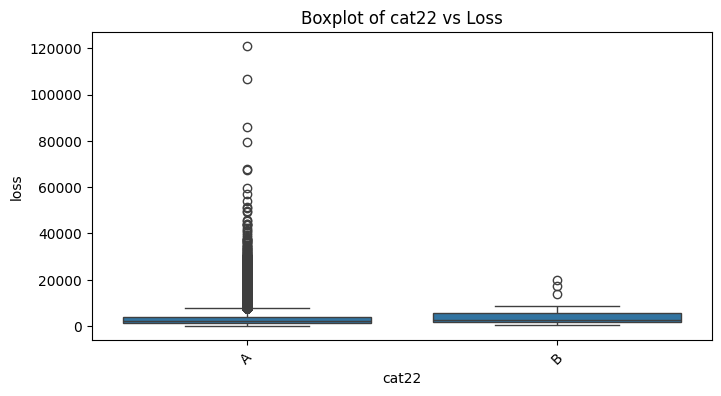

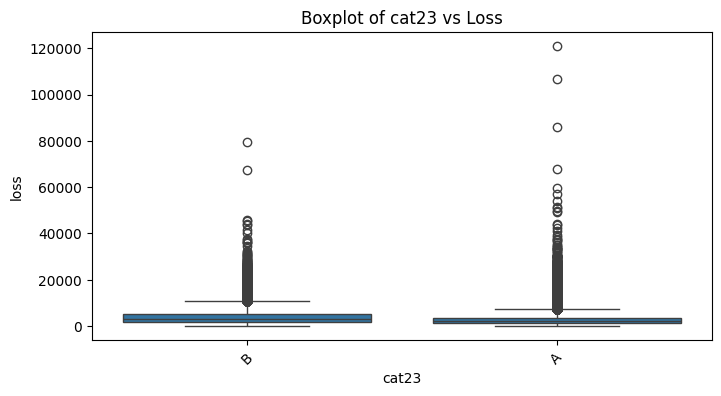

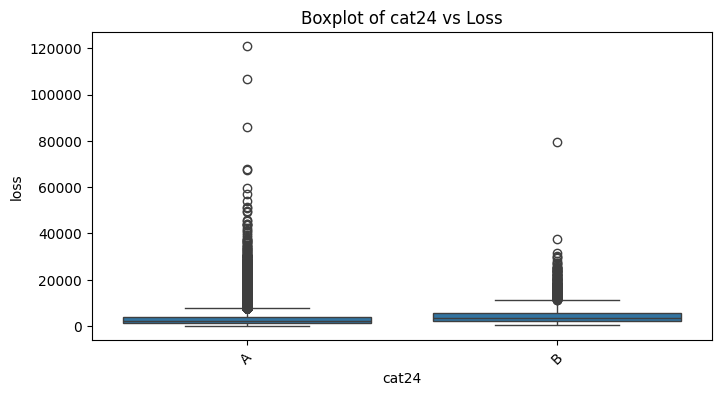

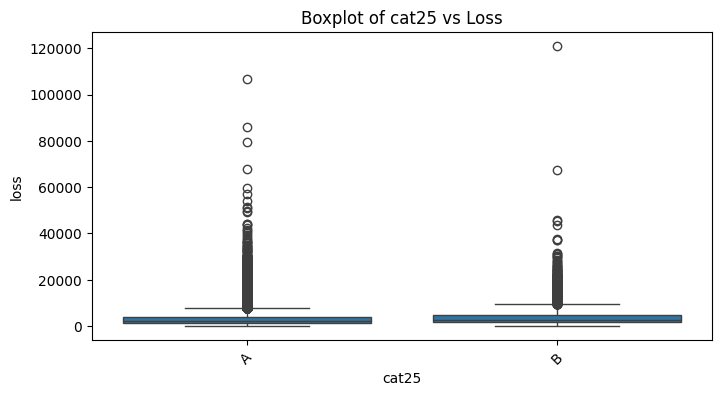

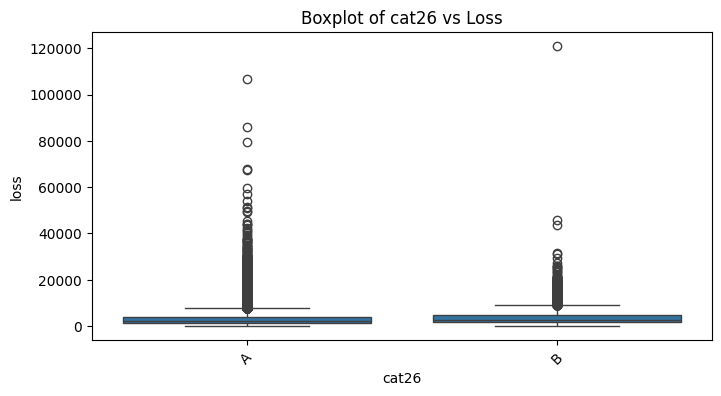

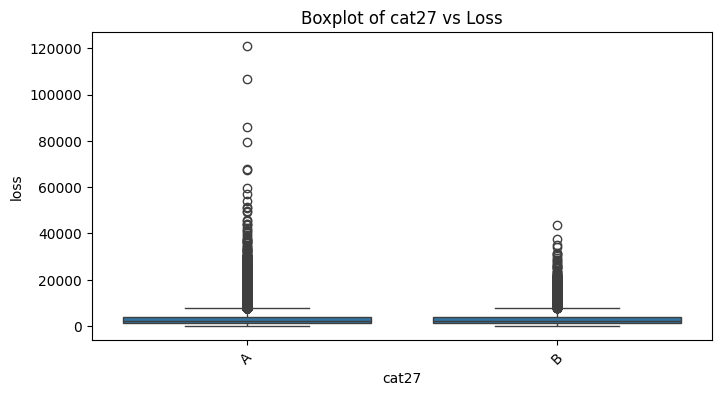

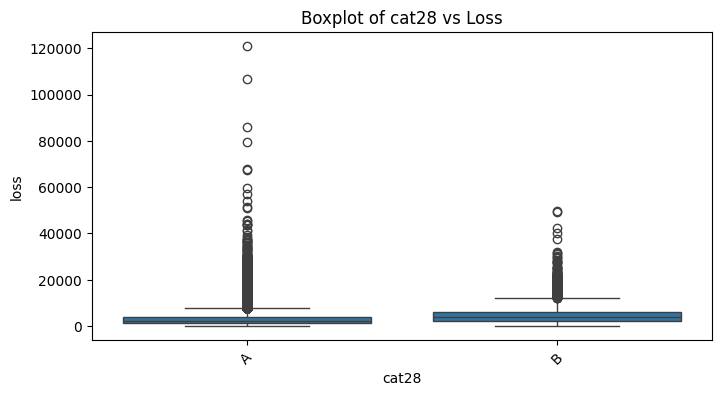

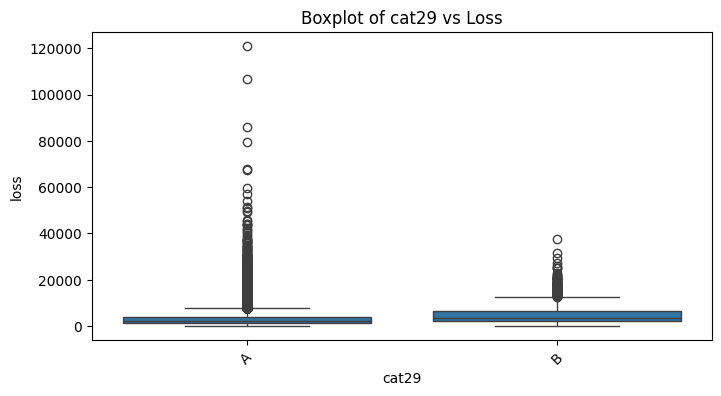

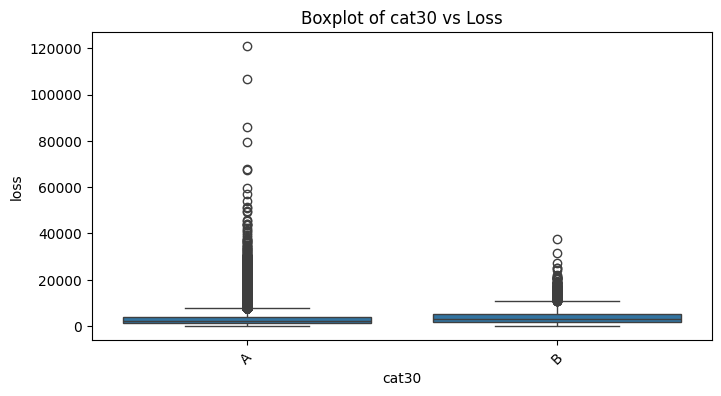

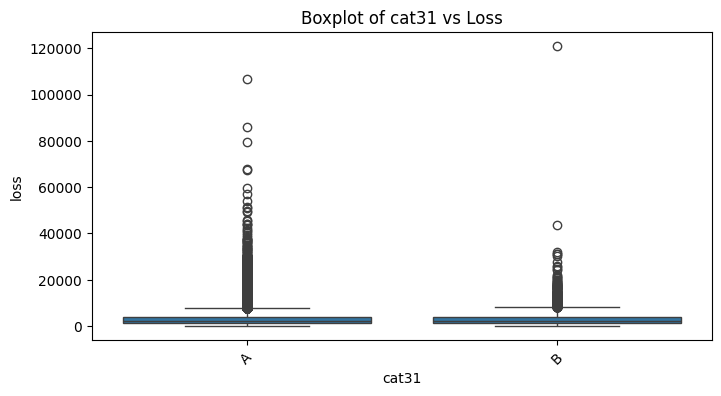

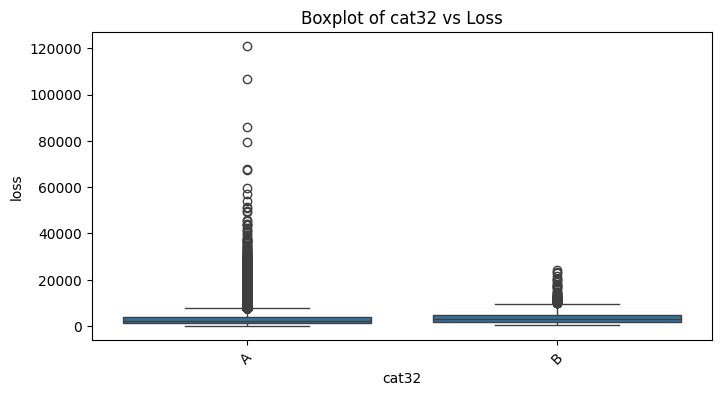

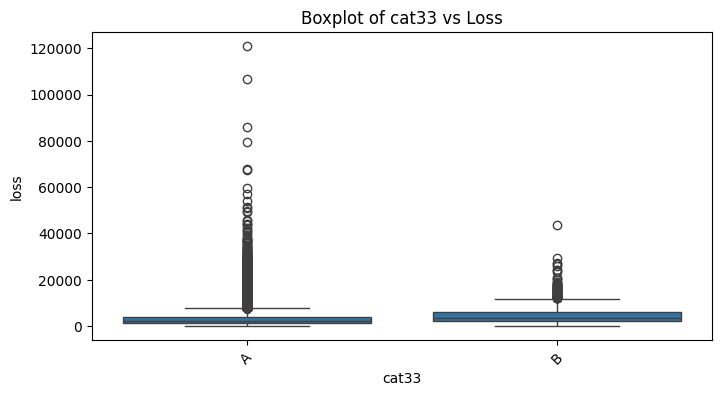

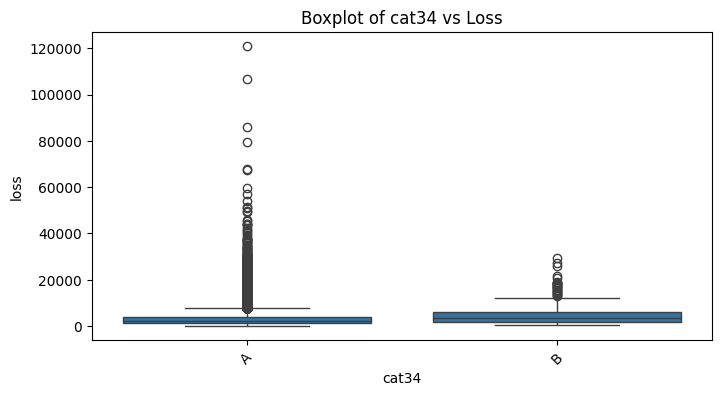

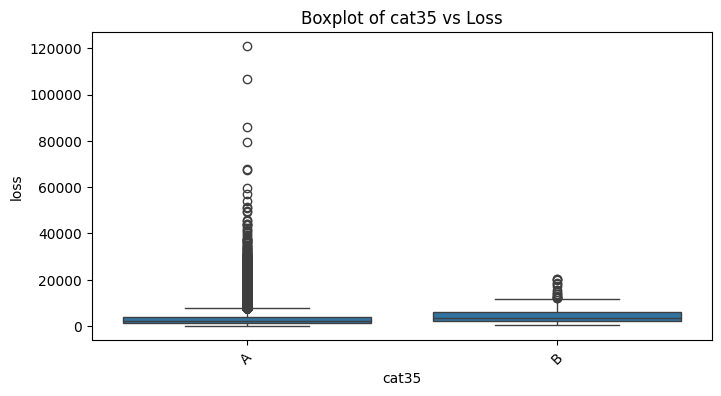

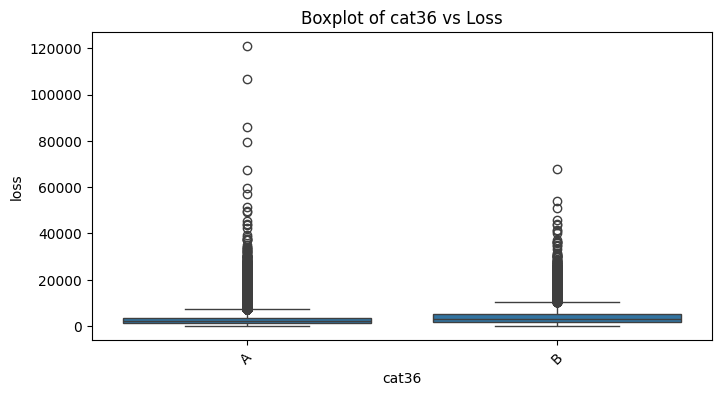

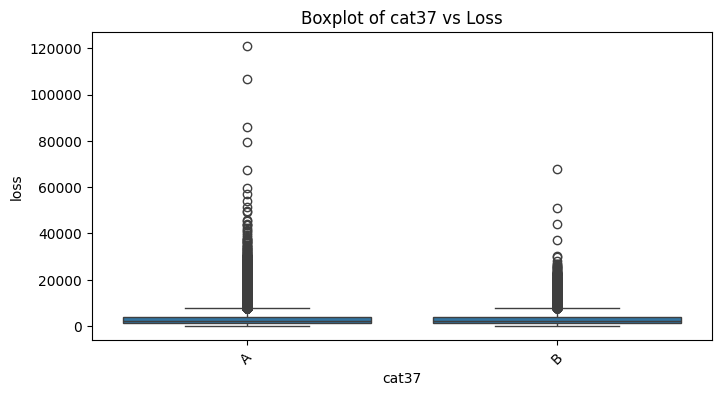

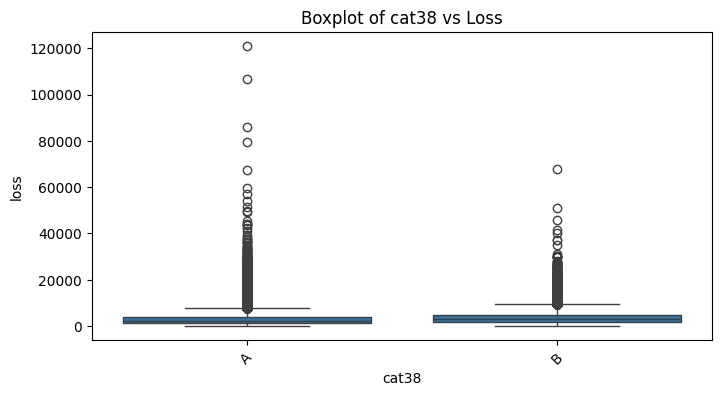

In [ ]:
for col in features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col], y=df["loss"])
    plt.title(f"Boxplot of {col} vs Loss")
    plt.xticks(rotation=45)
    plt.show()




In [ ]:
summary_stats = {}
for col in features:
    summary_stats[col] = df.groupby(col)["loss"].describe()

# Example: see summary for cat20
summary_stats["cat20"]

# Or print all
for col, stats in summary_stats.items():
    print(f"\n--- {col} ---")
    print(stats)



--- cat20 ---
          count         mean          std     min        25%       50%  \
cat20                                                                    
A      188114.0  3034.341926  2901.587807    0.67  1203.8725  2113.755   
B         204.0  5799.810245  3773.481985  524.29  2949.1350  4853.440   

             75%        max  
cat20                        
A      3858.6775  121012.25  
B      7871.5700   22459.68  

--- cat21 ---
          count         mean          std     min      25%      50%      75%  \
cat21                                                                          
A      187905.0  3036.461994  2903.672603    0.67  1204.29  2114.94  3862.46   
B         413.0  3435.756271  3064.344912  192.56  1325.64  2314.40  4606.57   

             max  
cat21             
A      121012.25  
B       18978.38  

--- cat22 ---
          count         mean          std     min      25%      50%       75%  \
cat22                                                       

In [ ]:
category_means = {}
for col in features:
    category_means[col] = df.groupby(col)["loss"].mean().sort_values(ascending=False)

# Example: check cat25 category means
category_means["cat25"]

# Or preview all at once
for col, means in category_means.items():
    print(f"\n--- {col} Mean Loss ---")
    print(means)



--- cat20 Mean Loss ---
cat20
B    5799.810245
A    3034.341926
Name: loss, dtype: float64

--- cat21 Mean Loss ---
cat21
B    3435.756271
A    3036.461994
Name: loss, dtype: float64

--- cat22 Mean Loss ---
cat22
B    4246.805349
A    3037.061456
Name: loss, dtype: float64

--- cat23 Mean Loss ---
cat23
B    4088.380380
A    2831.241328
Name: loss, dtype: float64

--- cat24 Mean Loss ---
cat24
B    4469.734789
A    2987.425719
Name: loss, dtype: float64

--- cat25 Mean Loss ---
cat25
B    3830.023371
A    2951.763318
Name: loss, dtype: float64

--- cat26 Mean Loss ---
cat26
B    3605.724191
A    3001.399359
Name: loss, dtype: float64

--- cat27 Mean Loss ---
cat27
B    3115.185717
A    3028.052370
Name: loss, dtype: float64

--- cat28 Mean Loss ---
cat28
B    4806.080232
A    2965.195184
Name: loss, dtype: float64

--- cat29 Mean Loss ---
cat29
B    4713.914907
A    3003.505145
Name: loss, dtype: float64

--- cat30 Mean Loss ---
cat30
B    4055.379295
A    3017.732836
Name: loss, dty

In [ ]:
feature_variances = {}

for col in features:
    means = df.groupby(col)["loss"].mean()
    feature_variances[col] = means.var()   # variance of category means

sorted_features = sorted(feature_variances.items(), key=lambda x: x[1], reverse=True)

print("\nFeatures ranked by variance in mean loss:")
for feat, var in sorted_features:
    print(f"{feat}: variance {var:.2f}")




Features ranked by variance in mean loss:
cat20: variance 3823907.51
cat28: variance 1694428.88
cat35: variance 1659103.58
cat33: variance 1516725.17
cat29: variance 1462750.78
cat34: variance 1359372.77
cat24: variance 1098620.09
cat23: variance 790199.30
cat36: variance 732401.36
cat22: variance 731740.14
cat30: variance 538355.09
cat38: variance 425603.09
cat25: variance 385670.36
cat32: variance 354417.93
cat26: variance 182604.25
cat21: variance 79717.96
cat31: variance 24125.74
cat37: variance 4837.02
cat27: variance 3796.11
